# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/kaggle/input/mentonres2/ICRISAT-District Level Data2.csv")

In [24]:
df.head(10)

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42
5,1,1971,14,Chhattisgarh,Durg,581.8,412.9,709.69,44.4,25.8,...,2000.00,0.0,0.0,0.0,5.42,7.48,12.91,0.01,0.54,0.38
6,1,1972,14,Chhattisgarh,Durg,582.2,381.0,654.41,39.6,20.6,...,2000.00,0.0,0.0,0.0,5.48,7.53,13.01,0.01,0.55,0.26
7,1,1973,14,Chhattisgarh,Durg,600.0,471.9,786.50,37.3,18.6,...,6000.00,0.0,0.0,0.0,5.30,7.60,12.90,0.01,0.53,0.14
8,1,1974,14,Chhattisgarh,Durg,587.4,219.0,372.83,36.5,22.4,...,1875.00,0.0,0.0,0.0,5.21,7.44,12.64,0.03,0.45,0.06
9,1,1975,14,Chhattisgarh,Durg,598.3,454.0,758.82,49.2,27.8,...,1750.00,0.0,0.0,0.0,5.11,7.86,12.97,0.05,0.52,0.08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

In [4]:
df.describe()

,Dist Code,Year,State Code,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),WHEAT YIELD (Kg per ha),KHARIF SORGHUM AREA (1000 ha),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
count,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,...,16146.00000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000
mean,269.769231,1991.496841,9.568562,128.593192,224.889565,1486.924784,77.057946,182.012746,1492.419859,22.632268,...,4500.15306,28.018367,7.229225,124.644823,7.750478,11.086250,18.677877,3.177038,1.194604,21.550328
std,278.309125,15.011185,4.988538,160.078825,326.629828,956.185281,100.394479,348.834254,1081.255367,45.062714,...,3153.97042,74.239648,25.042132,207.681147,13.591135,18.003257,25.881842,8.029509,4.285067,60.062601
min,1.000000,1966.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,78.000000,1978.000000,6.000000,10.400000,9.460000,800.000000,1.770000,2.000000,750.000000,0.000000,...,2000.00000,0.000000,0.000000,0.000000,0.310000,1.600000,2.520000,0.000000,0.060000,0.000000
50%,156.000000,1991.000000,10.000000,66.800000,95.840000,1333.210000,36.800000,42.700000,1347.450000,2.050000,...,4502.21000,0.050000,0.000000,0.000000,2.220000,4.740000,8.945000,0.390000,0.280000,1.200000
75%,241.000000,2005.000000,12.000000,191.390000,315.715000,2113.517500,123.000000,215.192500,2131.580000,20.900000,...,6704.60500,10.097500,2.000000,202.270000,8.790000,12.510000,23.570000,3.150000,0.880000,16.762500
max,917.000000,2017.000000,20.000000,1154.230000,3215.010000,5653.830000,879.490000,4305.500000,5541.520000,334.800000,...,22062.30000,800.890000,376.610000,5000.000000,159.540000,200.060000,240.990000,111.610000,131.350000,1162.660000


In [5]:
df.isnull().sum()

Dist Code                               0
Year                                    0
State Code                              0
State Name                              0
Dist Name                               0
                                       ..
VEGETABLES AREA (1000 ha)               0
FRUITS AND VEGETABLES AREA (1000 ha)    0
POTATOES AREA (1000 ha)                 0
ONION AREA (1000 ha)                    0
FODDER AREA (1000 ha)                   0
Length: 80, dtype: int64

In [6]:
df.duplicated().sum()

0

In [14]:
column_names = df.columns
print(column_names)

Index(['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name',
       'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)',
       'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)',
       'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)',
       'KHARIF SORGHUM AREA (1000 ha)',
       'KHARIF SORGHUM PRODUCTION (1000 tons)',
       'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)',
       'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)',
       'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)',
       'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)',
       'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)',
       'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)',
       'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)',
       'FINGER MILLET PRODUCTION (1000 tons)',
       'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)',
       'BARLEY PRODUCTION (1000 tons)', 'BARLEY 

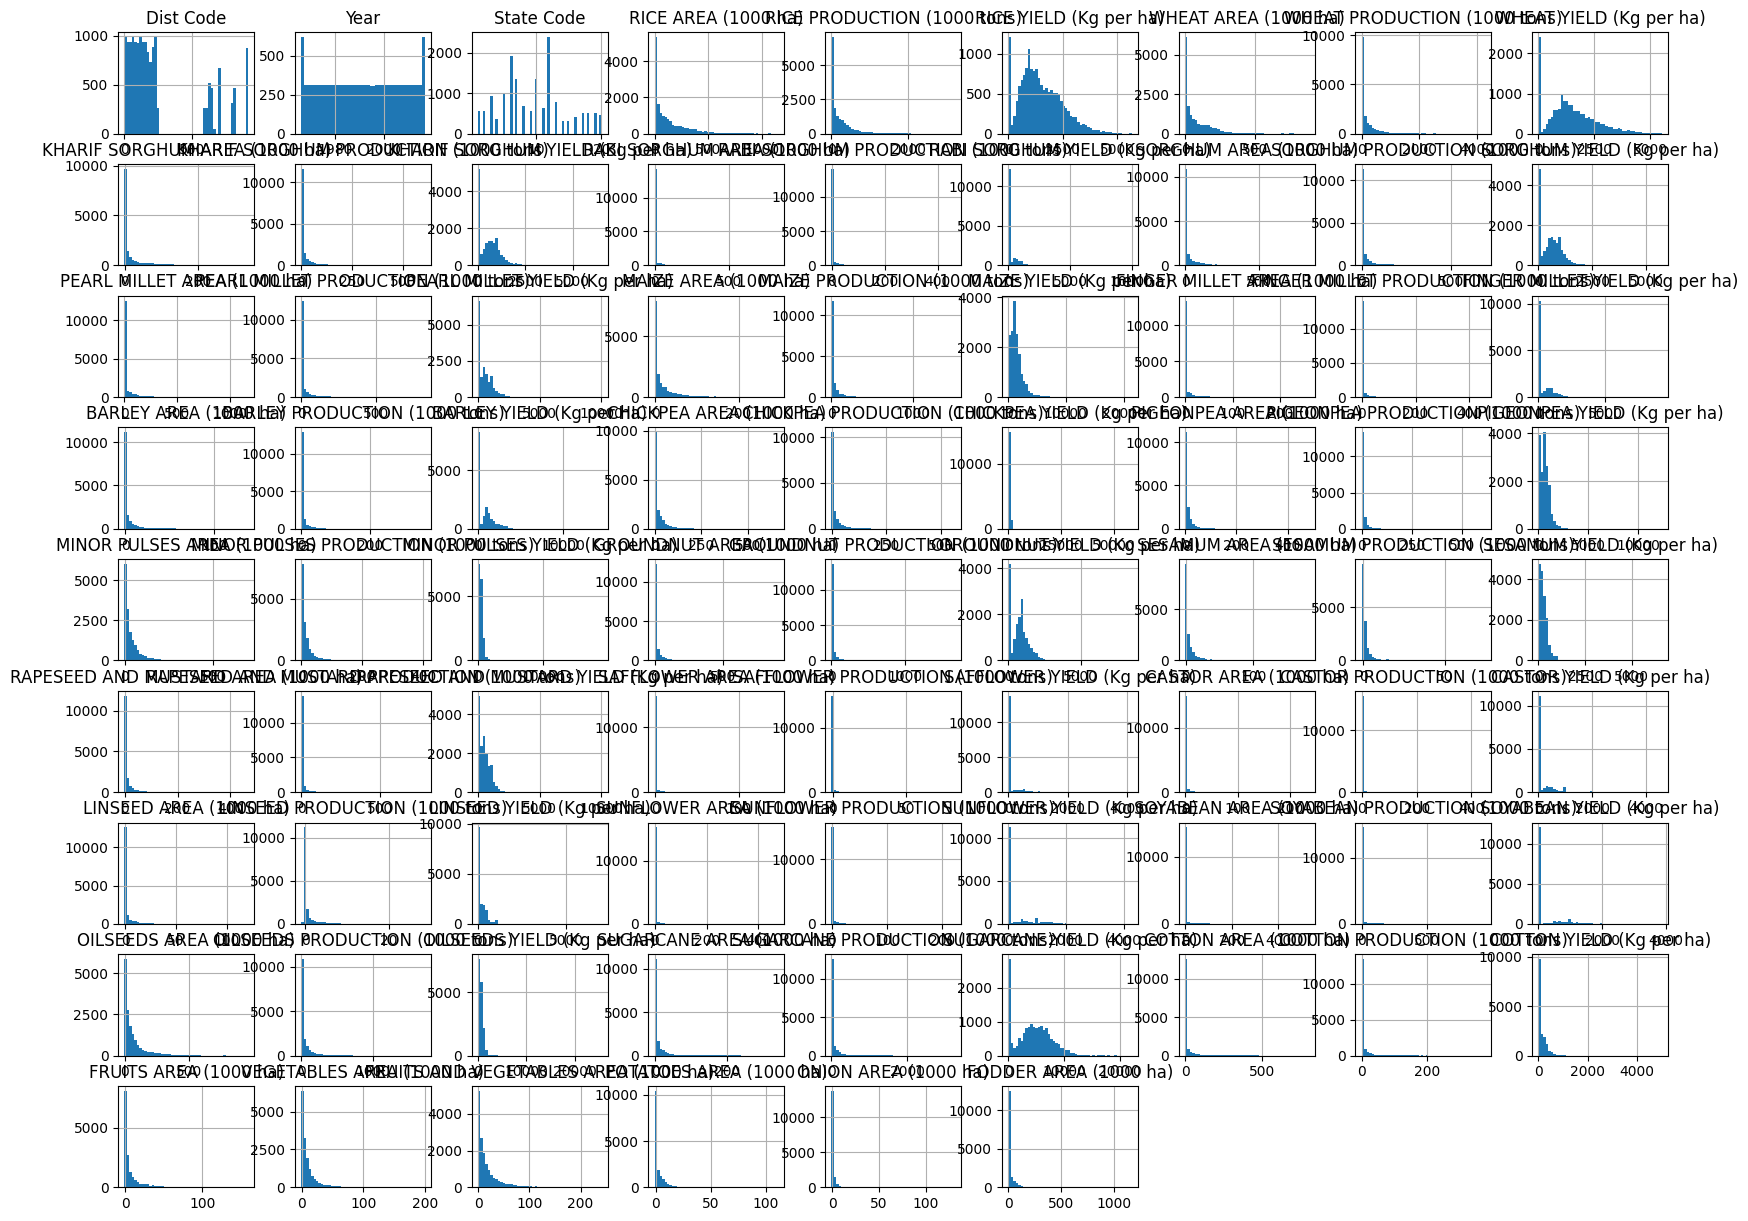

In [8]:
df.hist(figsize=(20,15),bins=50)
plt.show()

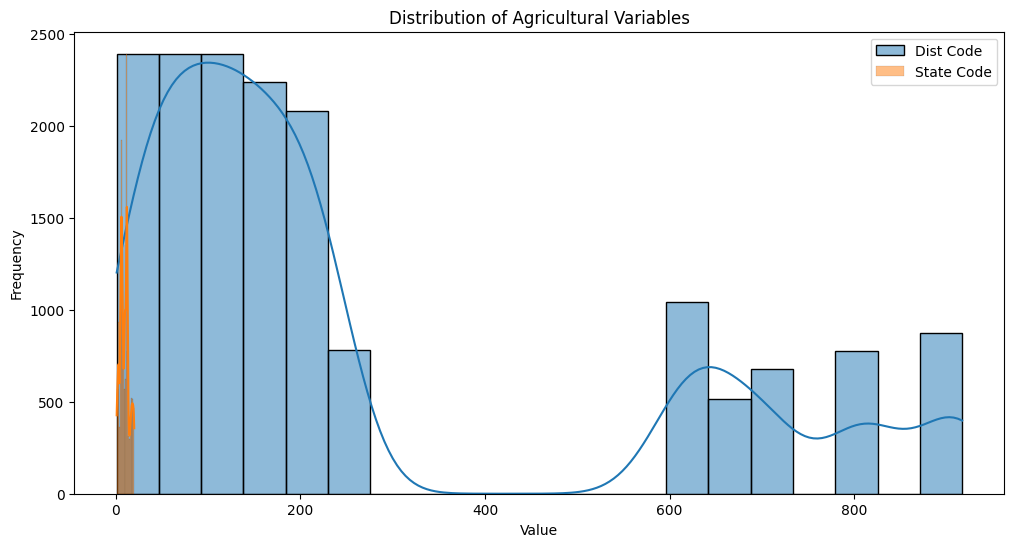

In [29]:
import warnings
warnings.filterwarnings("ignore")
agri_variables = ['Dist Code', 'State Code']
summary_stats = df.groupby(['Dist Code'])[agri_variables].describe()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
for var in agri_variables:
    sns.histplot(df[var], bins=20, kde=True, alpha=0.5, label=var)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Agricultural Variables')
plt.legend()
plt.show()

In [31]:
df.tail(20)

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
16126,917,1998,15,Jharkhand,Singhbhum,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.01,4.71,4.72,0.39,0.03,0.0
16127,917,1999,15,Jharkhand,Singhbhum,204.23,169.48,829.85,0.00,0.00,...,0.0,0.0,0.0,0.0,0.02,4.88,4.88,0.36,0.04,0.0
16128,917,2000,15,Jharkhand,Singhbhum,347.19,603.70,1738.82,3.05,4.40,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
16129,917,2001,15,Jharkhand,Singhbhum,316.24,537.24,1698.84,4.04,6.81,...,0.0,0.0,0.0,0.0,0.00,4.25,4.26,0.35,0.03,0.0
16130,917,2002,15,Jharkhand,Singhbhum,215.58,271.23,1258.14,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
16131,917,2003,15,Jharkhand,Singhbhum,284.60,338.16,1188.19,0.66,0.89,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
16132,917,2004,15,Jharkhand,Singhbhum,275.83,363.71,1318.60,0.54,0.67,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
16133,917,2005,15,Jharkhand,Singhbhum,281.03,190.89,679.25,0.58,0.52,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
16134,917,2006,15,Jharkhand,Singhbhum,290.34,485.24,1671.28,1.51,1.89,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.41,0.03,0.0
16135,917,2007,15,Jharkhand,Singhbhum,301.08,513.34,1705.00,0.61,0.83,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.43,0.03,0.0


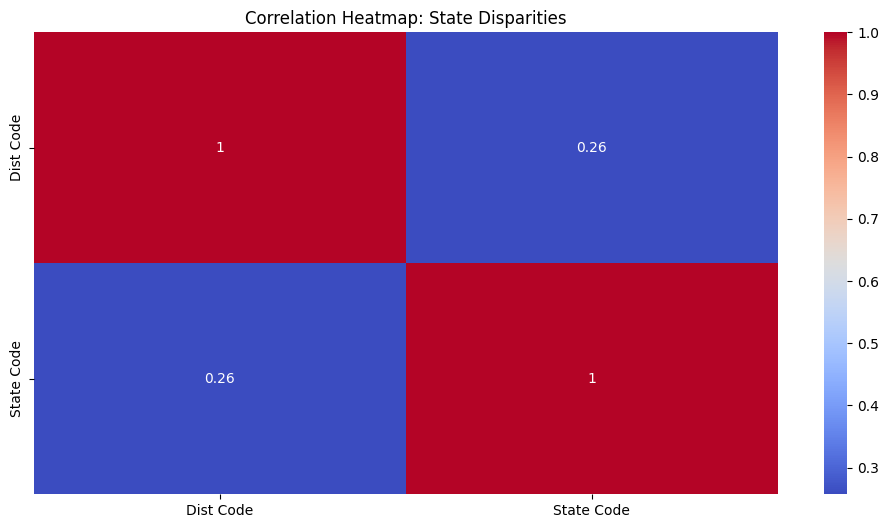

In [37]:

state_disparities = df.groupby('State Name')[agri_variables].mean()
plt.figure(figsize=(12, 6))
sns.heatmap(state_disparities.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: State Disparities')
plt.show()



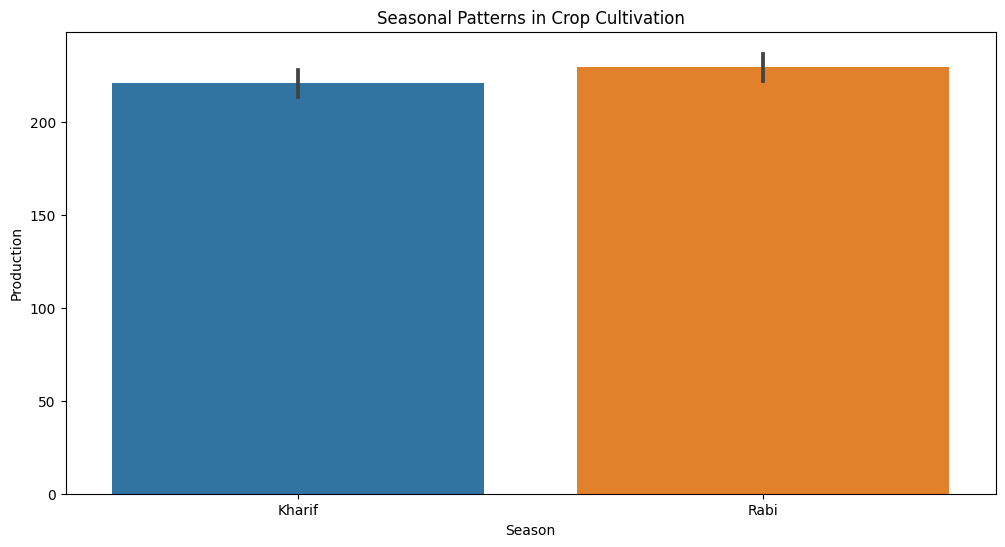

In [38]:
# Explore seasonal patterns
seasonal_data = df[['RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)', 'RICE YIELD (Kg per ha)',
                    'WHEAT AREA (1000 ha)', 'WHEAT PRODUCTION (1000 tons)']]
seasonal_data['Season'] = ['Kharif', 'Rabi'] * (len(seasonal_data) // 2)

# Visualize seasonal patterns
plt.figure(figsize=(12, 6))
sns.barplot(data=seasonal_data, x='Season', y='RICE PRODUCTION (1000 tons)')
plt.xlabel('Season')
plt.ylabel('Production')
plt.title('Seasonal Patterns in Crop Cultivation')
plt.show()


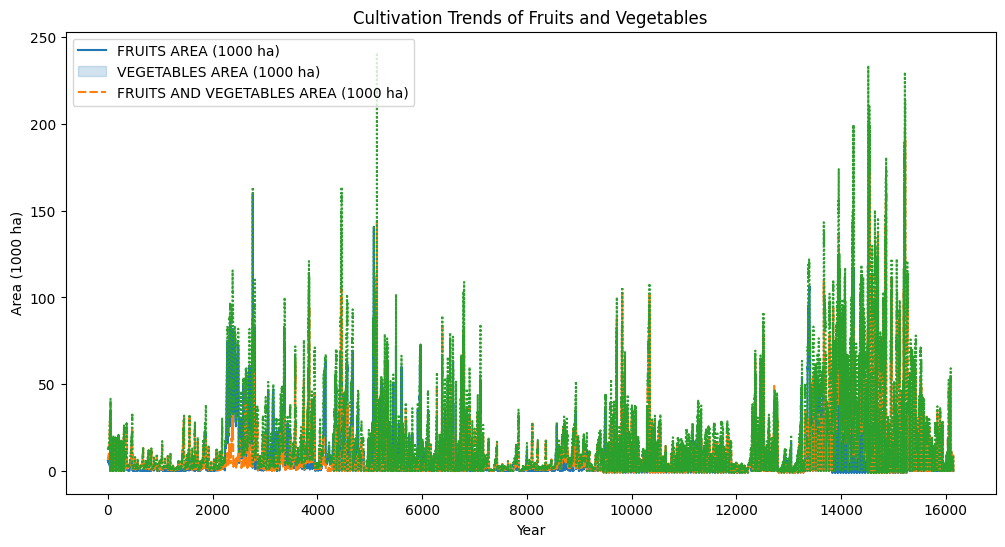

In [39]:
# Analyze cultivation trends of fruits and vegetables
fruits_veggies_data = df[['FRUITS AREA (1000 ha)', 'VEGETABLES AREA (1000 ha)', 
                          'FRUITS AND VEGETABLES AREA (1000 ha)']]

# Visualize trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=fruits_veggies_data)
plt.xlabel('Year')
plt.ylabel('Area (1000 ha)')
plt.title('Cultivation Trends of Fruits and Vegetables')
plt.legend(fruits_veggies_data.columns)
plt.show()


In [43]:

# Filter data for organic and conventional farming practices
organic_data = df[df['Dist Name'] == 'Yes']
conventional_data = df[df['State Code'] == 'No']

# Calculate average yield for each farming practice
organic_yield_mean = organic_data['RICE YIELD (Kg per ha)'].mean()
conventional_yield_mean = conventional_data['RICE YIELD (Kg per ha)'].mean()

print("Average yield for organic farming:", organic_yield_mean)
print("Average yield for conventional farming:", conventional_yield_mean)

# Perform statistical tests if necessary to validate differences


Average yield for organic farming: nan
Average yield for conventional farming: nan
